# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

In [3]:
# len(all_molecules)
# num_train
# all_molecules[:num_train]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

Linear Regression finds a relationship between one or more feature variables and a continuous target variable.
I implemented Linear Regression using a class and using gradient decent to find the variable which best fits to my training data.
I have taken learning rate as 0.046 as it was giving minimum MSE.

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [4]:
print("Learning Rate = ",0.046)

Learning Rate =  0.046


In [5]:
# implement Linear Regression
x_train=np.array(x_train)
class LinearRegression() :
    def __init__( self, learning_rate=0.046, n_iterations=900) :
        self.learning_rate =  learning_rate
        self.n_iterations=n_iterations

    def fit(self,x,y):

        self.cost_ = []
        # w = np.zeros((x_train, 1))
        # len(x_train)

        # x_train.shape
        m,n = x.shape
        self.w=np.zeros(n)

        for i in range(self.n_iterations):
            y_pred = np.dot(x,self.w)
            res = y_pred-y_train
            grad_vec = np.dot(x_train.T,res)
            self.w-=(self.learning_rate/m)*grad_vec
            cost = np.sum((res**2))/(2*m)
            self.cost_.append(cost)
        return self

    def predict(self ,x):
        return np.dot(x,self.w)


In [6]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# print(y_pred)


In [7]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))

0.498077900358207


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

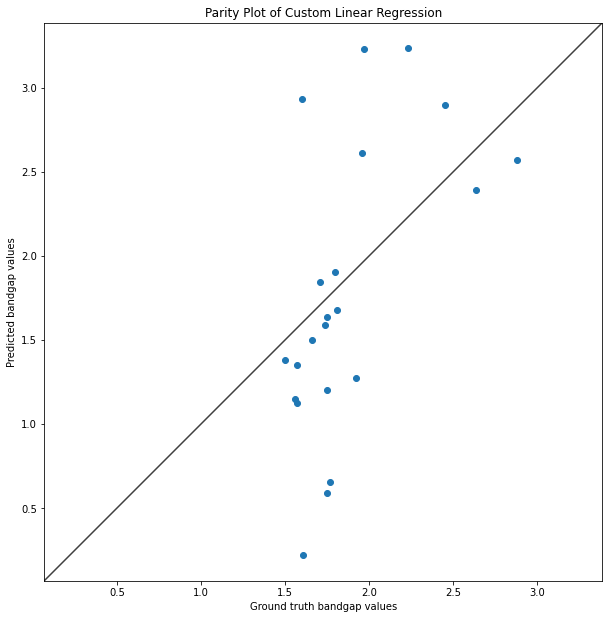

In [8]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

we change cost function of linear regression model to include additional cost for a model that has large cofficient because that is the problem with linear regression as cofficient can be very large. 
so we include l2 panality which is sum of the squared cofficient.
that modified model is called Ridge Regression model.

<!-- Your answer to 1.2.1 -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [9]:
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute

for i in np.arange(0,3,0.01):
    aph = i
    
    model = Ridge(alpha=aph)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    print('alpha : %.3f \t RMSE: %.3f' % (aph, std(scores)))
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

alpha : 0.000 	 RMSE: 0.024
alpha : 0.010 	 RMSE: 0.024
alpha : 0.020 	 RMSE: 0.024
alpha : 0.030 	 RMSE: 0.024
alpha : 0.040 	 RMSE: 0.024
alpha : 0.050 	 RMSE: 0.024
alpha : 0.060 	 RMSE: 0.023
alpha : 0.070 	 RMSE: 0.023
alpha : 0.080 	 RMSE: 0.023
alpha : 0.090 	 RMSE: 0.023
alpha : 0.100 	 RMSE: 0.023
alpha : 0.110 	 RMSE: 0.023
alpha : 0.120 	 RMSE: 0.023
alpha : 0.130 	 RMSE: 0.023
alpha : 0.140 	 RMSE: 0.022
alpha : 0.150 	 RMSE: 0.022
alpha : 0.160 	 RMSE: 0.022
alpha : 0.170 	 RMSE: 0.022
alpha : 0.180 	 RMSE: 0.022
alpha : 0.190 	 RMSE: 0.022
alpha : 0.200 	 RMSE: 0.022
alpha : 0.210 	 RMSE: 0.022
alpha : 0.220 	 RMSE: 0.021
alpha : 0.230 	 RMSE: 0.021
alpha : 0.240 	 RMSE: 0.021
alpha : 0.250 	 RMSE: 0.021
alpha : 0.260 	 RMSE: 0.021
alpha : 0.270 	 RMSE: 0.021
alpha : 0.280 	 RMSE: 0.021
alpha : 0.290 	 RMSE: 0.021
alpha : 0.300 	 RMSE: 0.021
alpha : 0.310 	 RMSE: 0.021
alpha : 0.320 	 RMSE: 0.021
alpha : 0.330 	 RMSE: 0.021
alpha : 0.340 	 RMSE: 0.021
alpha : 0.350 	 RMSE

alpha is a hyperparameter, default value is 1.0
here i am taking values of alpha from 0 to 3 with a separation of 0.01.
here alpha = 1.1 is giving best RMSE result.

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression is a regularized LR model which includes L1 panality.lasso regression shrinks the cofficient of those input variables that do not contribute much in the task of the prediction.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

alpha is a hyperparameter, default value is 1.0
here i am taking values of alpha from 0 to 3 with a separation of 0.01.
here alpha =0.02 is giving best RMSE result.

In [10]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute

for i in np.arange(0,3,0.01):
    # aph = random.randint(0,100)
    aph=i

    model = Lasso(alpha=aph)
    # cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    print('alpha : %.3f \t RMSE: %.3f' % (aph, std(scores)))

alpha : 0.000 	 RMSE: 0.024
alpha : 0.010 	 RMSE: 0.021


/home/aman/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/aman/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/aman/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/aman/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_desce

alpha : 0.020 	 RMSE: 0.027
alpha : 0.030 	 RMSE: 0.034
alpha : 0.040 	 RMSE: 0.042
alpha : 0.050 	 RMSE: 0.045
alpha : 0.060 	 RMSE: 0.051
alpha : 0.070 	 RMSE: 0.060
alpha : 0.080 	 RMSE: 0.070
alpha : 0.090 	 RMSE: 0.081
alpha : 0.100 	 RMSE: 0.088
alpha : 0.110 	 RMSE: 0.087
alpha : 0.120 	 RMSE: 0.081
alpha : 0.130 	 RMSE: 0.081
alpha : 0.140 	 RMSE: 0.081
alpha : 0.150 	 RMSE: 0.081
alpha : 0.160 	 RMSE: 0.081
alpha : 0.170 	 RMSE: 0.081
alpha : 0.180 	 RMSE: 0.081
alpha : 0.190 	 RMSE: 0.081
alpha : 0.200 	 RMSE: 0.081
alpha : 0.210 	 RMSE: 0.081
alpha : 0.220 	 RMSE: 0.081
alpha : 0.230 	 RMSE: 0.081
alpha : 0.240 	 RMSE: 0.081
alpha : 0.250 	 RMSE: 0.081
alpha : 0.260 	 RMSE: 0.081
alpha : 0.270 	 RMSE: 0.081
alpha : 0.280 	 RMSE: 0.081
alpha : 0.290 	 RMSE: 0.081
alpha : 0.300 	 RMSE: 0.081
alpha : 0.310 	 RMSE: 0.081
alpha : 0.320 	 RMSE: 0.081
alpha : 0.330 	 RMSE: 0.081
alpha : 0.340 	 RMSE: 0.081
alpha : 0.350 	 RMSE: 0.081
alpha : 0.360 	 RMSE: 0.081
alpha : 0.370 	 RMSE